In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv('Housing.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6207 entries, 0 to 6206
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                6207 non-null   int64 
 1   Area                 6207 non-null   int64 
 2   Location             6207 non-null   object
 3   No. of Bedrooms      6207 non-null   int64 
 4   Resale               6207 non-null   int64 
 5   MaintenanceStaff     6207 non-null   int64 
 6   Gymnasium            6207 non-null   int64 
 7   SwimmingPool         6207 non-null   int64 
 8   LandscapedGardens    6207 non-null   int64 
 9   JoggingTrack         6207 non-null   int64 
 10  RainWaterHarvesting  6207 non-null   int64 
 11  IndoorGames          6207 non-null   int64 
 12  ShoppingMall         6207 non-null   int64 
 13  Intercom             6207 non-null   int64 
 14  SportsFacility       6207 non-null   int64 
 15  ATM                  6207 non-null   int64 
 16  ClubHo

In [4]:
data.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,30000000,3340,JP Nagar Phase 1,4,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,7888000,1045,Dasarahalli on Tumkur Road,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,4866000,1179,Kannur on Thanisandra Main Road,2,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,8358000,1675,Doddanekundi,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,6845000,1670,Kengeri,3,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0


In [5]:
data.corr()

C:\Users\Bipinsaivarma Pemme\AppData\Local\Temp\ipykernel_6368\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
Price,1.000000,0.397626,0.234272,-0.038024,0.030497,0.031976,0.034450,0.029744,0.035339,0.033558,...,0.028814,0.033519,0.029598,0.033460,0.031330,0.033460,0.033460,0.033460,0.030335,0.033460
Area,0.397626,1.000000,0.733010,0.021379,0.008910,0.011436,0.014659,0.011841,0.016572,0.012948,...,0.008811,0.013280,0.010232,0.013166,0.010982,0.013166,0.013166,0.013166,0.009288,0.013166
No. of Bedrooms,0.234272,0.733010,1.000000,-0.015806,0.024080,0.027791,0.031352,0.028554,0.030822,0.028072,...,0.025848,0.027655,0.025736,0.027576,0.025264,0.027576,0.027576,0.027576,0.024300,0.027576
Resale,-0.038024,0.021379,-0.015806,1.000000,-0.034941,-0.032628,-0.034735,-0.032260,-0.032120,-0.029972,...,-0.030221,-0.036578,-0.026156,-0.036538,-0.034582,-0.036538,-0.036538,-0.036538,-0.033874,-0.036538
MaintenanceStaff,0.030497,0.008910,0.024080,-0.034941,1.000000,0.998428,0.997825,0.997381,0.997509,0.997057,...,0.997388,0.998145,0.996514,0.998159,0.998736,0.998159,0.998159,0.998159,0.999025,0.998159
Gymnasium,0.031976,0.011436,0.027791,-0.032628,0.998428,1.000000,0.998789,0.997748,0.998043,0.997460,...,0.998031,0.998325,0.997197,0.998334,0.998976,0.998334,0.998334,0.998334,0.999217,0.998334
SwimmingPool,0.034450,0.014659,0.031352,-0.034735,0.997825,0.998789,1.000000,0.997782,0.998037,0.996813,...,0.997225,0.997858,0.996706,0.997864,0.998366,0.997864,0.997864,0.997864,0.998554,0.997864
LandscapedGardens,0.029744,0.011841,0.028554,-0.032260,0.997381,0.997748,0.997782,1.000000,0.998167,0.997564,...,0.996521,0.996842,0.996338,0.996873,0.997503,0.996873,0.996873,0.996873,0.997692,0.996873
JoggingTrack,0.035339,0.016572,0.030822,-0.032120,0.997509,0.998043,0.998037,0.998167,1.000000,0.997309,...,0.996452,0.996870,0.997017,0.996902,0.997716,0.996902,0.996902,0.996902,0.997853,0.996902
RainWaterHarvesting,0.033558,0.012948,0.028072,-0.029972,0.997057,0.997460,0.996813,0.997564,0.997309,1.000000,...,0.996917,0.996533,0.997442,0.996563,0.997307,0.996563,0.996563,0.996563,0.997617,0.996563


C:\Users\Bipinsaivarma Pemme\AppData\Local\Temp\ipykernel_6368\681407281.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<Axes: >

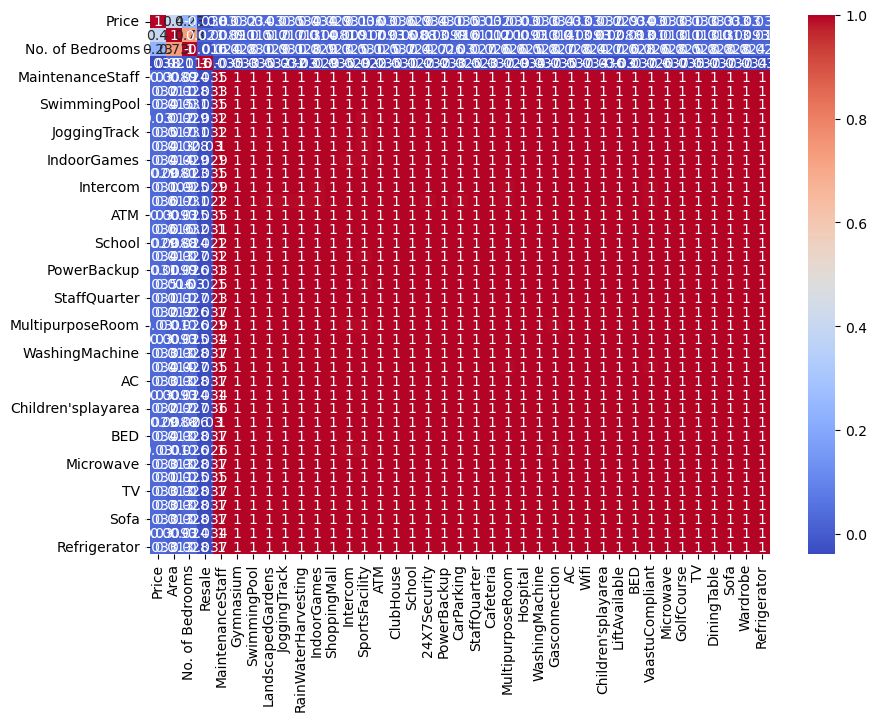

In [6]:
corr = data.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr,cmap='coolwarm',annot=True)

In [7]:
X = data[['Area','No. of Bedrooms']]
y = data['Price']

In [8]:
X = X.apply(pd.to_numeric,errors='coerce')
y = y.apply(pd.to_numeric,errors='coerce')

In [9]:
X.fillna(0,inplace=True)
y.fillna(0,inplace=True)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model = LinearRegression()

In [12]:
model.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred = model.predict(X_test)

In [14]:
new_data = pd.DataFrame({'Area': [1200], 'No. of Bedrooms':[3]})
predicted_price = model.predict(new_data)
print(f'Predicted Price: {predicted_price[0]}')

Predicted Price: 6578997.562122616


In [15]:
from sklearn.metrics import r2_score,mean_absolute_error
score = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)

In [16]:
score

0.13320863048639575

In [17]:
mae

5236146.306638807